# **Tarea 3**

## **Parte 1: Funciones para calcular medidas de tendencia central y de dispersión**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import mannwhitneyu

In [4]:
# Carga de datos
trans=pd.read_csv('C:/Users/sandy/Downloads/trans_vf.csv')

In [5]:
# vializamos los primeros datos para validar la correcta lectura de la base
trans.head()

,Unnamed: 0,Timestamp,From Bank,From_Acc,To Bank,To_Acc,Amount Received,R_CCY,Amount Paid,P_CCY,Payment_Format,Is Laundering
0,0,2022-09-01 00:20:00,10,441453,10,441453,3697.34,8,3697.34,8,5,0
1,3,2022-09-01 00:02:00,12,242838,12,242838,2806.97,8,2806.97,8,5,0
2,4,2022-09-01 00:06:00,10,505858,10,505858,36682.97,8,36682.97,8,5,0
3,8,2022-09-01 00:26:00,12,314237,2439,19647,7.66,8,7.66,8,4,0
4,13,2022-09-01 00:17:00,10,92542,36056,133917,106.70,8,106.70,8,4,0


In [6]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147470 entries, 0 to 1147469
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1147470 non-null  int64  
 1   Timestamp        1147470 non-null  object 
 2   From Bank        1147470 non-null  int64  
 3   From_Acc         1147470 non-null  int64  
 4   To Bank          1147470 non-null  int64  
 5   To_Acc           1147470 non-null  int64  
 6   Amount Received  1147470 non-null  float64
 7   R_CCY            1147470 non-null  int64  
 8   Amount Paid      1147470 non-null  float64
 9   P_CCY            1147470 non-null  int64  
 10  Payment_Format   1147470 non-null  int64  
 11  Is Laundering    1147470 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 105.1+ MB


In [7]:
# cambiamos el tipo de dato a datetime
trans['Timestamp'] = pd.to_datetime(trans['Timestamp'])

#eliminamos primer columna que no es de utilidad
trans=trans.drop(trans.columns[0], axis=1)

#visualizamos primeros 5 datos
trans.head(5)

,Timestamp,From Bank,From_Acc,To Bank,To_Acc,Amount Received,R_CCY,Amount Paid,P_CCY,Payment_Format,Is Laundering
0,2022-09-01 00:20:00,10,441453,10,441453,3697.34,8,3697.34,8,5,0
1,2022-09-01 00:02:00,12,242838,12,242838,2806.97,8,2806.97,8,5,0
2,2022-09-01 00:06:00,10,505858,10,505858,36682.97,8,36682.97,8,5,0
3,2022-09-01 00:26:00,12,314237,2439,19647,7.66,8,7.66,8,4,0
4,2022-09-01 00:17:00,10,92542,36056,133917,106.70,8,106.70,8,4,0


In [8]:
#validamos el tipo de datos de las variables
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147470 entries, 0 to 1147469
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Timestamp        1147470 non-null  datetime64[ns]
 1   From Bank        1147470 non-null  int64         
 2   From_Acc         1147470 non-null  int64         
 3   To Bank          1147470 non-null  int64         
 4   To_Acc           1147470 non-null  int64         
 5   Amount Received  1147470 non-null  float64       
 6   R_CCY            1147470 non-null  int64         
 7   Amount Paid      1147470 non-null  float64       
 8   P_CCY            1147470 non-null  int64         
 9   Payment_Format   1147470 non-null  int64         
 10  Is Laundering    1147470 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(8)
memory usage: 96.3 MB


Medidas de tendencia central

Antes de comenzar con estas medidas, se creará una columna de monto en dólares, ya que los montos de pago y recepción están representados en su divisa original y no permite hacer comparaciones entre ellas.

Dado que las transacciones corresponden al mes de septiembre del 2022 y para mayor practicidad, se considera la equivalencia de las monedas de con el dólar de los Estados Unidos de América, correspondiente al mes de octubre de 2022, de acuerdo con el [DOF](https://www.dof.gob.mx/nota_detalle.php?codigo=5670684&fecha=07/11/2022&print=true) publicado el 07/11/2022. Para el equivalente de [Bitcoin](https://es.statista.com/estadisticas/1236504/bitcoin-historial-de-precios/).

In [9]:
tipo_de_cambio = {
    0: 0.28352,#'Shekel': 0,
    1: 0.19130,#'Brazil Real': 1,
    2: 0.63775,#'Australian Dollar': 2,
    3: 0.00672,#'Yen': 3,
    4: 0.73240,#'Canadian Dollar': 4,
    5: 0.26620,#'Saudi Riyal': 5,
    6: 0.04981,#'Mexican Peso': 6,
    7: 1.15000,#'UK Pound': 7,
    8: 1,#'US Dollar': 8 (moneda base)
    9: 20623.87,#'Bitcoin': 9,
    10: 0.98885,#'Euro': 10,
    11: 0.13695,#'Yuan': 11,
    12: 0.01207,#'Rupee': 12,
    13: 0.99730,#'Swiss Franc': 13,
    14: 0.01623,#'Ruble': 14
}

# Columna Monto_USD utilizando el diccionario de tipos de cambio
trans['Monto_USD'] = trans['P_CCY'].map(tipo_de_cambio)*trans['Amount Paid']

In [10]:
trans.describe()

,Timestamp,From Bank,From_Acc,To Bank,To_Acc,Amount Received,R_CCY,Amount Paid,P_CCY,Payment_Format,Is Laundering,Monto_USD
count,1147470,1.147470e+06,1.147470e+06,1.147470e+06,1.147470e+06,1.147470e+06,1.147470e+06,1.147470e+06,1.147470e+06,1.147470e+06,1.147470e+06,1.147470e+06
mean,2022-09-05 13:13:05.905566720,1.895939e+04,2.585268e+05,3.887360e+04,2.576021e+05,6.478249e+06,8.028028e+00,6.143617e+06,8.027675e+00,2.929528e+00,1.083253e-03,2.771476e+05
min,2022-09-01 00:00:00,1.000000e+00,4.000000e+00,1.000000e+00,1.600000e+01,1.000000e-06,0.000000e+00,1.000000e-06,0.000000e+00,0.000000e+00,0.000000e+00,6.720000e-05
25%,2022-09-02 11:53:00,1.500000e+01,1.333060e+05,2.700000e+01,1.302030e+05,2.071425e+02,7.000000e+00,2.079600e+02,7.000000e+00,2.000000e+00,0.000000e+00,1.619828e+02
50%,2022-09-05 20:04:00,1.100000e+02,2.582720e+05,1.006000e+04,2.570870e+05,1.781870e+03,8.000000e+00,1.783450e+03,8.000000e+00,3.000000e+00,0.000000e+00,8.754700e+02
75%,2022-09-08 06:11:00,1.197400e+04,3.839690e+05,2.662400e+04,3.850500e+05,1.839029e+04,1.000000e+01,1.835236e+04,1.000000e+01,4.000000e+00,0.000000e+00,4.974671e+03
max,2022-09-17 07:48:00,3.562530e+05,5.150770e+05,3.533920e+05,5.150620e+05,9.659333e+11,1.400000e+01,9.659333e+11,1.400000e+01,6.000000e+00,1.000000e+00,1.165881e+10
std,NaN,5.383607e+04,1.458183e+05,6.868808e+04,1.480826e+05,9.413184e+08,3.031173e+00,9.399827e+08,3.024084e+00,1.458012e+00,3.289499e-02,1.384577e+07


In [11]:
def media(data):
    return sum(data)/len(data)

media(trans['Monto_USD'])

277147.5597392316

In [12]:
def mediana(data):
    data_ord = data.sort_values()
    if (len(data) % 2) == 0:
        x = (data_ord.iloc[int(len(data) / 2)] + data_ord.iloc[int(len(data)/2-1)]) / 2
    else:
        x = data_ord.iloc[int(len(data) / 2)]
    return x

mediana(trans['Monto_USD'])

875.47

In [13]:
def var(data):
    media=sum(data)/len(data)
    return sum((data-media)**2)/(len(data)-1)

var(trans['Monto_USD'])


191705365277324.66

In [14]:
def desv_std(data):
    media=sum(data)/len(data)
    return (sum((data-media)**2)/(len(data)-1))**(1/2)

desv_std(trans['Monto_USD'])

13845770.66390039

## **Parte 2: Determinar si son datos paramétricos o no paramétricos**

Se hace uso de la prueba Kolmogorov-Smirnov para comprobar la normalidad de la columna de montos en dólares ya que son más de un millón de datos.

In [15]:
from scipy import stats
p_value = stats.kstest(trans['Monto_USD'], 'norm').pvalue
p_value

0.0

Se revisa la frecuencia de aparición de las monedas, así como la normalidad de sus montos por tipo de moneda.

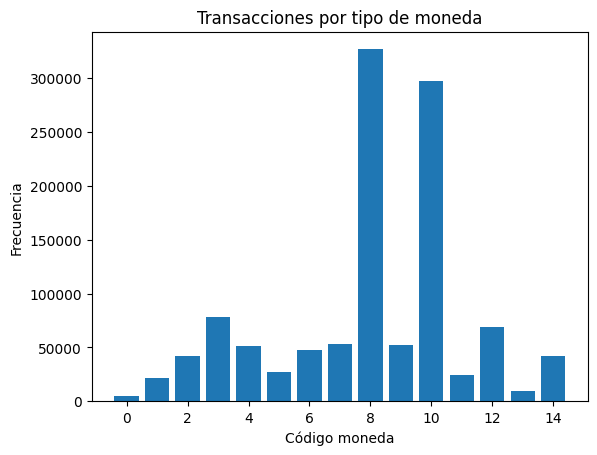

In [16]:
frecuencias = trans['P_CCY'].value_counts().reset_index()
frecuencias.columns = ['Moneda', 'Frecuencia']

plt.bar(frecuencias['Moneda'], frecuencias['Frecuencia'])

plt.xlabel('Código moneda')
plt.ylabel('Frecuencia')
plt.title('Transacciones por tipo de moneda')

plt.show()

In [17]:
currency=trans['P_CCY'].unique()

for ccy in currency:
    subset = trans[trans['P_CCY'] == ccy]
    stat, p_value = stats.shapiro(subset['Monto_USD'])
    
    print(f"Tipo de Moneda: {ccy}")
    
    if p_value < 0.05:
        print("Los datos no siguen una distribución normal con p-value", {p_value} )
    else:
        print("Los datos parecen seguir una distribución normal con p-value", {p_value})

C:\Users\sandy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Tipo de Moneda: 8
Los datos no siguen una distribución normal con p-value {0.0}
Tipo de Moneda: 10
Los datos no siguen una distribución normal con p-value {0.0}
Tipo de Moneda: 9
Los datos no siguen una distribución normal con p-value {0.0}
Tipo de Moneda: 2
Los datos no siguen una distribución normal con p-value {0.0}
Tipo de Moneda: 11
Los datos no siguen una distribución normal con p-value {0.0}
Tipo de Moneda: 3
Los datos no siguen una distribución normal con p-value {0.0}
Tipo de Moneda: 12
Los datos no siguen una distribución normal con p-value {0.0}
Tipo de Moneda: 4
Los datos no siguen una distribución normal con p-value {0.0}
Tipo de Moneda: 7
Los datos no siguen una distribución normal con p-value {0.0}
Tipo de Moneda: 6
Los datos no siguen una distribución normal con p-value {0.0}
Tipo de Moneda: 14
Los datos no siguen una distribución normal con p-value {0.0}
Tipo de Moneda: 1
Los datos no siguen una distribución normal con p-value {0.0}
Tipo de Moneda: 13
Los datos no sigu

Los montos en dólares no se distribuyen de manera normal.

## **Parte 3: Estadísticos descrptivos básicos**

In [18]:
import statistics

In [19]:
trans.describe()

,Timestamp,From Bank,From_Acc,To Bank,To_Acc,Amount Received,R_CCY,Amount Paid,P_CCY,Payment_Format,Is Laundering,Monto_USD
count,1147470,1.147470e+06,1.147470e+06,1.147470e+06,1.147470e+06,1.147470e+06,1.147470e+06,1.147470e+06,1.147470e+06,1.147470e+06,1.147470e+06,1.147470e+06
mean,2022-09-05 13:13:05.905566720,1.895939e+04,2.585268e+05,3.887360e+04,2.576021e+05,6.478249e+06,8.028028e+00,6.143617e+06,8.027675e+00,2.929528e+00,1.083253e-03,2.771476e+05
min,2022-09-01 00:00:00,1.000000e+00,4.000000e+00,1.000000e+00,1.600000e+01,1.000000e-06,0.000000e+00,1.000000e-06,0.000000e+00,0.000000e+00,0.000000e+00,6.720000e-05
25%,2022-09-02 11:53:00,1.500000e+01,1.333060e+05,2.700000e+01,1.302030e+05,2.071425e+02,7.000000e+00,2.079600e+02,7.000000e+00,2.000000e+00,0.000000e+00,1.619828e+02
50%,2022-09-05 20:04:00,1.100000e+02,2.582720e+05,1.006000e+04,2.570870e+05,1.781870e+03,8.000000e+00,1.783450e+03,8.000000e+00,3.000000e+00,0.000000e+00,8.754700e+02
75%,2022-09-08 06:11:00,1.197400e+04,3.839690e+05,2.662400e+04,3.850500e+05,1.839029e+04,1.000000e+01,1.835236e+04,1.000000e+01,4.000000e+00,0.000000e+00,4.974671e+03
max,2022-09-17 07:48:00,3.562530e+05,5.150770e+05,3.533920e+05,5.150620e+05,9.659333e+11,1.400000e+01,9.659333e+11,1.400000e+01,6.000000e+00,1.000000e+00,1.165881e+10
std,NaN,5.383607e+04,1.458183e+05,6.868808e+04,1.480826e+05,9.413184e+08,3.031173e+00,9.399827e+08,3.024084e+00,1.458012e+00,3.289499e-02,1.384577e+07


In [20]:
print("Moneda más usada para pagos: ", statistics.multimode(trans['P_CCY']), "para recepción: ",statistics.multimode(trans['R_CCY']))

Moneda más usada para pagos:  [8] para recepción:  [8]


El tipo de moneda preponderante en las transacciones es el dólar americano.

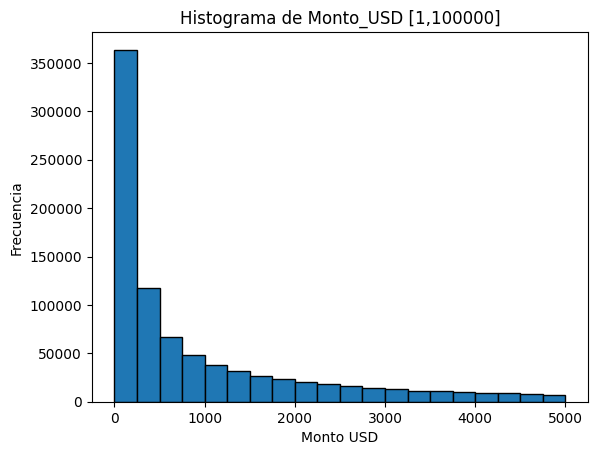

In [22]:
# De la estadística descriptiva se observa que el 75% de las transacciones se encuentran debajo de los 5,000 USD (p 0.75 = 4.974671e+03)

data = trans[trans['Monto_USD']<=5000]
data

# Crea un histograma
plt.hist(data['Monto_USD'], bins=20, edgecolor='k')
plt.xlabel('Monto USD')
plt.ylabel('Frecuencia')
plt.title('Histograma de Monto_USD [1,100000]')
plt.show()

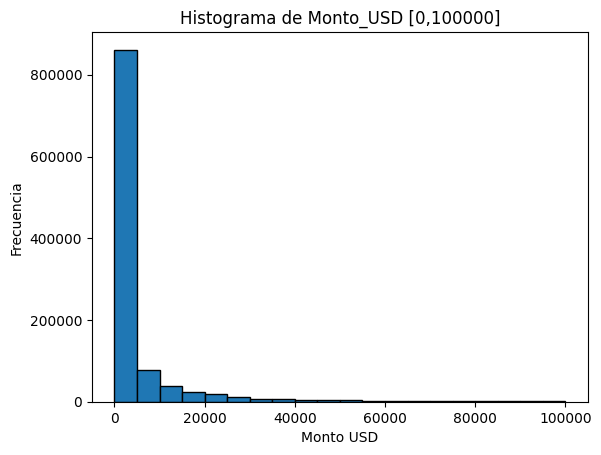

In [23]:
# ampliando un poco el subconjunto vemos cómo se distribuye en monto más grandes
data = trans[trans['Monto_USD']<=100000]
data


plt.hist(data['Monto_USD'], bins=20, edgecolor='k')
plt.xlabel('Monto USD')
plt.ylabel('Frecuencia')
plt.title('Histograma de Monto_USD [0,100000]')
plt.show()

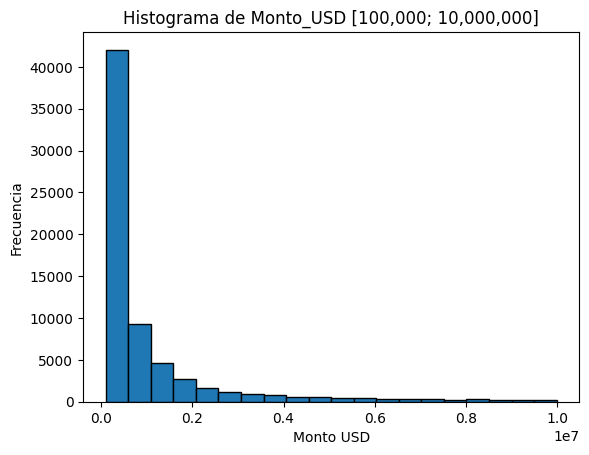

In [24]:

data = trans[(trans['Monto_USD']>=100000) & (trans['Monto_USD']<=10000000)]
data

plt.hist(data['Monto_USD'], bins=20, edgecolor='k')
plt.xlabel('Monto USD')
plt.ylabel('Frecuencia')
plt.title('Histograma de Monto_USD [100,000; 10,000,000]')
plt.show()

La mayoría de las transacciones son de montos menores a 5,000 USD. Se construyeron histogramas segregando las transacciones [1,100000] y [100000, 10000000] para visualizar mejor su distribución.

Ahora se revisará la distribución del monto en las transacciones identificadas como LD.

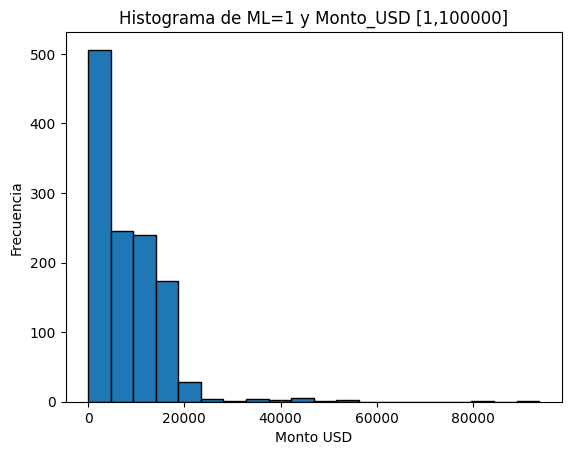

In [25]:
# ahora se revisa la distribución por identificador de LD.
data=trans[(trans['Is Laundering']==1) & (trans['Monto_USD']<=100000) ]
data

# Crea un histograma
plt.hist(data['Monto_USD'], bins=20, edgecolor='k')
plt.xlabel('Monto USD')
plt.ylabel('Frecuencia')
plt.title('Histograma de ML=1 y Monto_USD [1,100000]')
plt.show()

In [26]:
len(data)/len(trans[trans['Is Laundering']==1])

#el 97.7% de las transacciones de LD corresponden a montos <= 100,000 de USD. habría que analizar montos acumulados por cuentas y bancos.

0.9774738535800482

Text(0.5, 1.0, 'Transacciones por forma de pago')

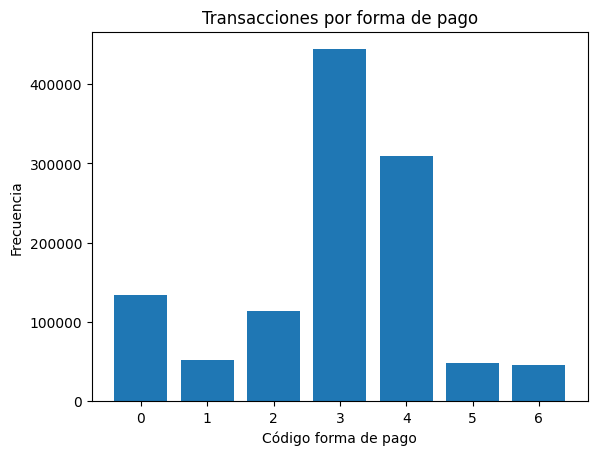

In [27]:
#Distribución de las variables

frecuencias = trans['Payment_Format'].value_counts().reset_index()
frecuencias.columns = ['Payment_Format', 'Frecuencia']

plt.bar(frecuencias['Payment_Format'], frecuencias['Frecuencia'])

# Agregar etiquetas y título
plt.xlabel('Código forma de pago')
plt.ylabel('Frecuencia')
plt.title('Transacciones por forma de pago')

# 0: ACH, 1: Bitcoin, 2: Cash, 3: Cheque, 4: Credit Card, 5: Reinvestment, 6: Wire

<Figure size 640x480 with 0 Axes>

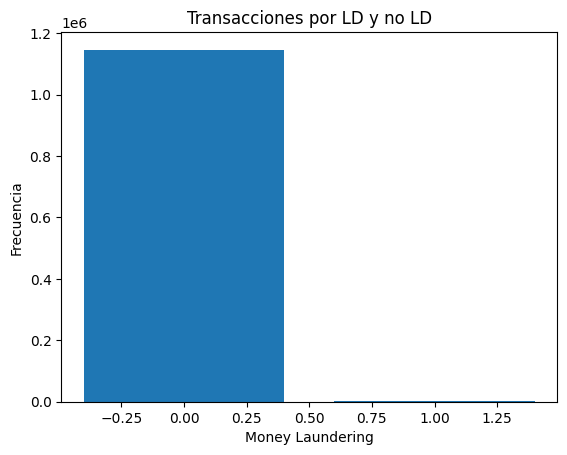

<Figure size 640x480 with 0 Axes>

In [28]:
frecuencias = trans['Is Laundering'].value_counts().reset_index()
frecuencias.columns = ['Laundering', 'Frecuencia']

plt.bar(frecuencias['Laundering'], frecuencias['Frecuencia'])

# Agregar etiquetas y título
plt.xlabel('Money Laundering')
plt.ylabel('Frecuencia')
plt.title('Transacciones por LD y no LD')

# Mostrar el gráfico
plt.figure()


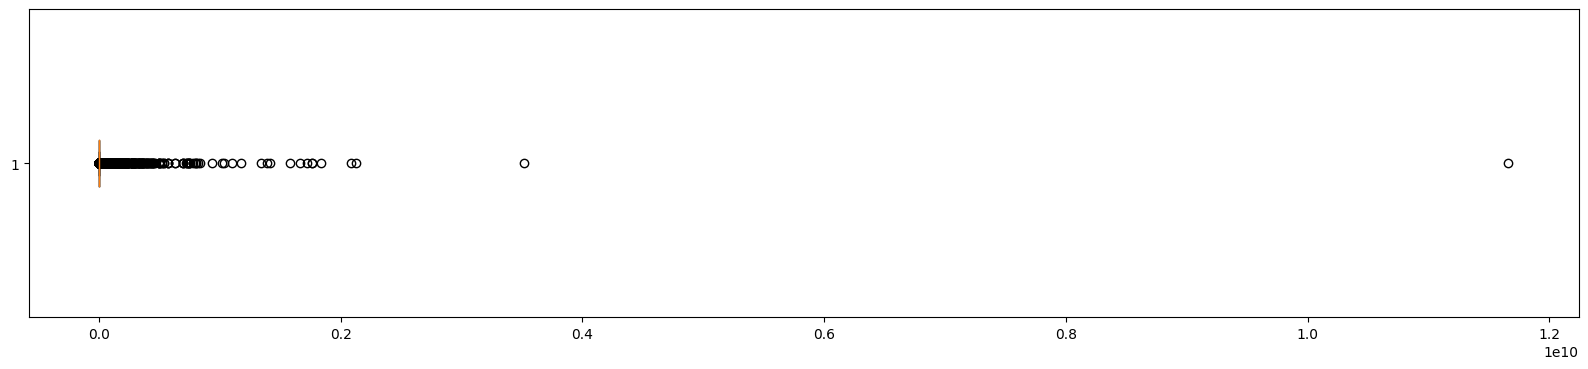

In [29]:
plt.figure(figsize=(20, 4))
plt.boxplot(trans['Monto_USD'], vert = False)

ax = plt.gca()

plt.show()

#con el boxplot se observan los montos atípicos y la concentración de los montos en valores pequeños

## **Parte 4: Correlación**

In [30]:
# Matriz de correlación
trans.corr()


,Timestamp,From Bank,From_Acc,To Bank,To_Acc,Amount Received,R_CCY,Amount Paid,P_CCY,Payment_Format,Is Laundering,Monto_USD
Timestamp,1.000000,-0.005366,0.000781,0.023992,0.001947,-0.001290,0.002231,-0.001254,0.002271,-0.081199,0.020086,-0.008249
From Bank,-0.005366,1.000000,-0.002616,0.007147,0.006863,0.001481,-0.052567,0.001491,-0.052753,-0.030932,0.002576,0.000659
From_Acc,0.000781,-0.002616,1.000000,-0.004305,0.069925,0.000316,0.011824,0.000099,0.012020,-0.000123,0.000495,0.001046
To Bank,0.023992,0.007147,-0.004305,1.000000,0.000497,-0.000473,-0.034387,-0.000364,-0.034483,-0.027377,-0.007379,0.000008
To_Acc,0.001947,0.006863,0.069925,0.000497,1.000000,-0.001277,-0.002825,-0.001494,-0.002572,0.000639,-0.000818,-0.001584
Amount Received,-0.001290,0.001481,0.000316,-0.000473,-0.001277,1.000000,0.001197,0.998608,0.001130,-0.004154,-0.000090,0.809850
R_CCY,0.002231,-0.052567,0.011824,-0.034387,-0.002825,0.001197,1.000000,0.001061,0.994093,-0.023844,0.000202,0.001833
Amount Paid,-0.001254,0.001491,0.000099,-0.000364,-0.001494,0.998608,0.001061,1.000000,0.001060,-0.003445,-0.000079,0.808860
P_CCY,0.002271,-0.052753,0.012020,-0.034483,-0.002572,0.001130,0.994093,0.001060,1.000000,-0.023704,0.000207,0.001685
Payment_Format,-0.081199,-0.030932,-0.000123,-0.027377,0.000639,-0.004154,-0.023844,-0.003445,-0.023704,1.000000,-0.061115,-0.010802


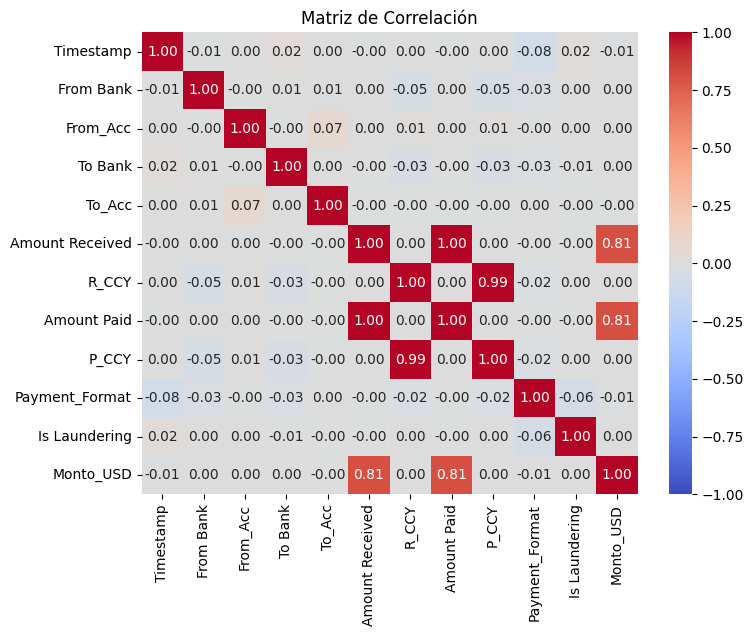

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(trans.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# Mostrar la matriz de correlación
plt.title('Matriz de Correlación')
plt.show()

De la matriz de correlaciones, se observa que las variables no tienen correlación con la variable respuesta, es decir, no se identifica relación de las características individuales de la transacción con su determinación de LD.

Esto no necesariamente es un problema ya que es dificil juzgar si una transacción es legítima solo por sus características inherentes, más bien implica un análisis más profundo y complejo de relaciones o vinculaciones con otras transacciones.

Por otro lado, vemos que la correlación entre las monedas de pago y rececpción es fuerte y positiva, lo cual sugiere que la moneda de pago es la misma que de recepción en la mayoría de los casos, lo cuál también explicaría la alta correlación positiva entre los montos de pago y recepción, los cuáles están expresados en la moneda original.

## **Parte 5: Prueba de Hipótesis**

De los gráficos creados en la sección de estadística descriptiva básica, se observó que tanto las transacciones identificadas como LD como las que no, mantienen montos bajos. 

Apoyándonos de la matriz de correlación, se observa que no hay correlación entre el monto de la transacción y su dictaminación como no legítima. 

Sin embargo, se hará una prueba para corroborar estadísticamente la relación entre las ditribuciones de dichas poblaciones.

In [99]:
data1=trans[trans['Is Laundering']==0]
data2=trans[trans['Is Laundering']==1]

print(len(data1), len(data2))
#el tamaño de las poblaciones es muy diferente, la prueba puede ser sensible a esto

1146227 1243


In [32]:
#prueba de Kolmogorov-Smirnov
data1=trans[trans['Is Laundering']==0]
data2=trans[trans['Is Laundering']==1]

stat, p_value = stats.ks_2samp(data1['Monto_USD'], data2['Monto_USD'])

a = 0.01

# rechazo de H0: las distribuciones son iguales, Ha: las distribuciones son diferentes.
if p_value < a:
    print("Se rechaza H0: Las distribuciones son diferentes.")
else:
    print("No se rechaza H0: Las distribuciones son iguales.")


Se rechaza H0: Las distribuciones son diferentes.


In [33]:
stat, p_value = mannwhitneyu(data1['Monto_USD'], data2['Monto_USD'])
print(f"Estadístico: {stat}")
print(f"Valor p: {p_value}")

#se realiza la prueba u y se corrobora que las distribuciones son distintas

Estadístico: 401063568.5
Valor p: 1.002133393652273e-156


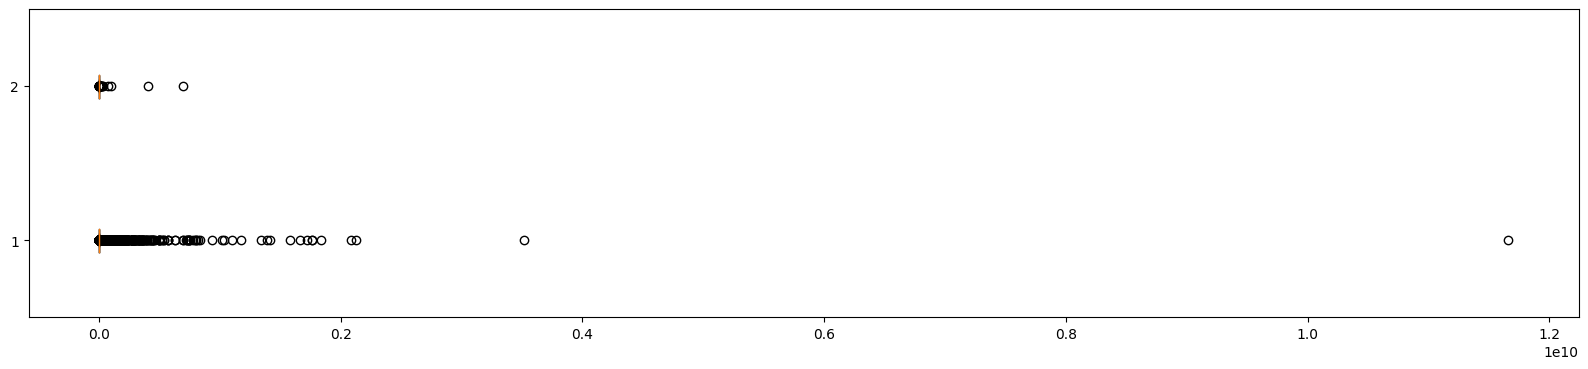

In [34]:
plt.figure(figsize=(20, 4))
plt.boxplot(data1['Monto_USD'], positions=[1] ,vert = False)
plt.boxplot(data2['Monto_USD'], positions=[2] ,vert = False)

ax = plt.gca()

plt.show()

#con el boxplot se observa una concencetración en los montos bajos, 
#pero las transacciones que no son identificadas como LD presentan un mayor rango